<a href="https://colab.research.google.com/github/jazmichewcam/EDP1/blob/main/METODO_RICHARDSON_JAZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Metodo implícito de Richardson**


Consideremos el siguiente problema de la ecuación de calor unidimensional:

\begin{align*}
&\frac{\partial u}{\partial t}(x,t) - \alpha^2 \frac{\partial^2 u}{\partial x^2}(x,t) = 0 \\[2ex]
&\text{Parámetro: } \alpha = 1 \\[1ex]
&\text{Dominio: } 0 < x < 1, \quad 0 < t < \infty
\end{align*}

Sujeto a las condiciones de contorno e inicial:

\begin{align*}
&u(0,t) = u(1,t) = 0 \quad \text{(condiciones de Dirichlet homogéneas)} \\[1ex]
&u(x,0) = \sin(\pi x) \quad \text{para } 0 \leq x \leq 1
\end{align*}

Esta configuración modela la distribución de temperatura en una barra unidimensional de longitud unitaria, donde:

  

*    Los extremos se mantienen a temperatura cero (condiciones de contorno fijas)
*   La distribución inicial de temperatura sigue un perfil sinusoidal


*   El punto de máxima temperatura inicial se encuentra en $x = 0.5$




   
   




Vamos a discretizar la ecuación usando diferencias finitas:

Para la derivada en el tiempo $t$ usamos diferencias hacia atrás:
$$\frac{\partial u}{\partial t} \approx \frac{u_{i,j}-u_{i,j-1}}{k}$$

Para la derivada segunda en el espacio $x$ usamos diferencias centradas:
$$\frac{\partial^2 u}{\partial x^2} \approx \frac{u_{i+1,j}-2u_{i,j}+u_{i-1,j}}{h^2}$$


Metemos estas aproximaciones en la ecuación del calor y nos queda:

$$u_{i,j-1} = (1+2\lambda)u_{i,j} - \lambda u_{i+1,j} - \lambda u_{i-1,j}$$

donde $\lambda = \dfrac{\alpha^2 k}{h^2}$ es nuestro parámetro de discretización.

Para resolver numéricamente, elegimos:

 $h = 0.1$ (paso en el espacio),
 $k = 0.01$ (paso en el tiempo)  


Como $\alpha = 1$, nos queda:
$$\lambda = \frac{1^2 \times 0.01}{0.1^2} = \frac{0.01}{0.01} = 1$$

Con lo que obtenemos $\lambda = 1$. Esto va a simplificar los cálculos.



In [ ]:
import sympy as sp
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # necesario para 3D
from matplotlib import cm  # colormap

In [ ]:
def f(x):
    return np.sin(np.pi*x)

In [ ]:
A = sp.Matrix([[3,-1, 0, 0, 0, 0, 0, 0, 0],
              [-1, 3,-1, 0, 0, 0, 0, 0, 0],
              [0, -1, 3,-1, 0, 0, 0, 0, 0],
              [0, 0, -1, 3,-1, 0, 0, 0, 0],
              [0, 0, 0, -1, 3,-1, 0, 0, 0],
              [0, 0, 0, 0, -1, 3,-1, 0, 0],
              [0, 0, 0, 0, 0, -1, 3,-1, 0],
              [0, 0, 0, 0, 0, 0, -1, 3,-1],
              [0, 0, 0, 0, 0, 0, 0, -1, 3,]])

**Ejercicio 1**: Codificar la matriz A de manera más simple.

In [ ]:
# =============================================================================
# CONSTRUCCIÓN AUTOMATIZADA DE MATRIZ PARA MÉTODO DE RICHARDSON
# =============================================================================

def matriz_richardson(n, lam):

    # Crear matriz de ceros n x n usando sympy
    # sp.zeros es más eficiente para matrices dispersas que np.zeros
    A_nueva = sp.zeros(n, n)

    # Bucle para construir matriz tridiagonal
    # En matrices de diferencias finitas, i representa la ecuación en el punto x_i
    for i in range(n):
        # Diagonal principal: coeficiente del punto actual u_i
        A_nueva[i, i] = 1 + 2*lam      # diagonal principal

        # Subdiagonal: coeficiente del punto izquierdo u_{i-1}
        # i > 0 evita acceso a índice -1 (fuera de la matriz)
        if i > 0:
            A_nueva[i, i-1] = -lam     # subdiagonal

        # Superdiagonal: coeficiente del punto derecho u_{i+1}
        # i < n-1 evita acceso a índice n (fuera de la matriz)
        if i < n-1:
            A_nueva[i, i+1] = -lam     # diagonal superior

    return A_nueva

In [ ]:
n = 9 # numero de puntos interiores por iteracion en t
lam = 1  # o el valor que tengas (dt/dx**2)

A_nueva = matriz_richardson(n, lam)
A_nueva


Matrix([
[ 3, -1,  0,  0,  0,  0,  0,  0,  0],
[-1,  3, -1,  0,  0,  0,  0,  0,  0],
[ 0, -1,  3, -1,  0,  0,  0,  0,  0],
[ 0,  0, -1,  3, -1,  0,  0,  0,  0],
[ 0,  0,  0, -1,  3, -1,  0,  0,  0],
[ 0,  0,  0,  0, -1,  3, -1,  0,  0],
[ 0,  0,  0,  0,  0, -1,  3, -1,  0],
[ 0,  0,  0,  0,  0,  0, -1,  3, -1],
[ 0,  0,  0,  0,  0,  0,  0, -1,  3]])

In [ ]:
b = sp.Matrix([f(0.1), f(0.2), f(0.3), f(0.4), f(0.5), f(0.6), f(0.7), f(0.8), f(0.9)])
b #puntos interiores de la malla

Matrix([
[0.309016994374947],
[0.587785252292473],
[0.809016994374947],
[0.951056516295154],
[              1.0],
[0.951056516295154],
[0.809016994374947],
[0.587785252292473],
[0.309016994374948]])

**Ejercicio 2**: Definir las entradas de b de manera más simple (quizás con un bucle).

In [ ]:

# Optimización: En lugar de escribir manualmente cada punto,
# generamos automáticamente el vector usando comprensión de listas

h = 0.1  # Tamaño del paso espacial (delta x)

# Construcción del vector usando comprensión de listas:
# - range(1, n+1): genera índices i = 1, 2, 3, ..., n
# - i*h: calcula la posición x en el dominio (0.1, 0.2, 0.3, ...)
# - f(i*h): evalúa la condición inicial en cada punto x

# - sp.Matrix(...): convierte la lista resultante en matriz columna
b_nuevo = sp.Matrix([f(i*h) for i in range(1, n+1)])

# b_nuevo es una matriz columna de SymPy que contiene:
# [f(1*h), f(2*h), f(3*h), ..., f(n*h)]
# que corresponde a los valores en los puntos interiores x = h, 2h, 3h, ..., nh

b_nuevo

Matrix([
[0.309016994374947],
[0.587785252292473],
[0.809016994374947],
[0.951056516295154],
[              1.0],
[0.951056516295154],
[0.809016994374947],
[0.587785252292473],
[0.309016994374948]])

In [ ]:
A_nueva.LUsolve(b_nuevo) # Obtenemos la factorizacion LU
# para las matrices que creamos

Matrix([
[0.281465217775586],
[0.535378658951812],
[0.736885506787377],
[ 0.86626086703537],
[ 0.91084057802358],
[ 0.86626086703537],
[0.736885506787377],
[0.535378658951812],
[0.281465217775587]])

In [ ]:
def richardson_1(A, b, j):
    b_1 = b
    for i in range(j+1):
        sol = A.LUsolve(b_1)
        b_1 = sol
        _ = None #Para que no imprima resultados parciales
    return b_1

In [ ]:
def richardson(A, b, j):

    # Lista para almacenar todas las soluciones en cada iteración
    S = []

    # Creamos una copia del vector b para no modificar el original

    b_1 = b.copy()

    # Bucle principal de iteraciones
    for i in range(j+1):  # j+1 iteraciones: desde 0 hasta j
        # Guardamos el estado actual del vector b_1
        # Convertimos de SymPy Matrix a numpy array y aplanamos a vector 1D
        S.append(np.array(b_1, dtype=float).reshape(-1))  # vector fila

        # Resolvemos el sistema lineal A * sol = b_1 usando descomposición LU
        # A.LUsolve() es eficiente para matrices tridiagonales como las de diferencias finitas
        sol = A.LUsolve(b_1)

        # Actualizamos b_1 con la nueva solución para la siguiente iteración
        b_1 = sol


    return np.array(S)   # matriz resultado


**Ejercicio 4**: Graficar para un valor particular de t > 0 y comparar contra la gráfica de la solución exacta (quizás necesite calcularla).  

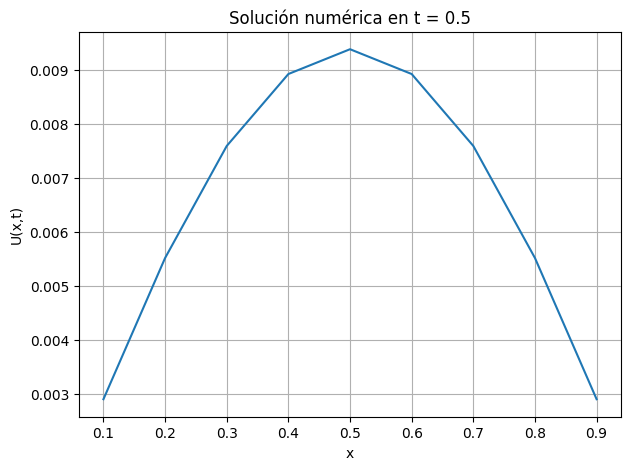

In [ ]:
# =============================================================================
# SIMULACIÓN Y VISUALIZACIÓN DE LA SOLUCIÓN NUMÉRICA
# =============================================================================

# Configuración de parámetros temporales para la simulación
t_f = 0.5  # Tiempo final al que queremos aproximar la solución (debe ser > 0)
k = 0.01   # Tamaño del paso temporal (delta t)

# Creación del vector de posiciones espaciales (puntos interiores)
# Genera las coordenadas x de los puntos interiores: [h, 2h, 3h, ..., n*h]
x_in = np.array([i*h for i in range(1, n+1)], float)


# Cálculo del número de iteraciones temporales necesarias
Nt = int(t_f / k)    # Conversión a int para usar en range()


# =============================================================================
# SIMULACIÓN TEMPORAL - AVANCE EN EL TIEMPO
# =============================================================================

# Inicialización con la condición inicial u(x,0) = f(x)
sol_num = sp.Matrix([f(x) for x in x_in])  # Vector de temperatura inicial

# Bucle de evolución temporal: avanza la solución paso a paso
for _ in range(Nt):
    # En cada paso temporal, resolvemos el sistema lineal:
    # A_nueva * u_{nuevo} = u_actual
    # Esto avanza la solución un paso temporal Δt
    sol_num = A_nueva.solve(sol_num)   # Pasos en el tiempo

# Conversión del resultado final a formato NumPy para visualización
sol_num = np.array(sol_num, float).flatten()
# flatten() asegura que el array sea 1D, resolviendo problemas de dimensiones
# para la graficación

# =============================================================================
# VISUALIZACIÓN DE LA SOLUCIÓN NUMÉRICA
# =============================================================================

plt.figure(figsize=(7,5))
plt.plot(x_in, sol_num)
plt.xlabel('x')  # Eje horizontal: posición en la barra
plt.ylabel('U(x,t)')  # Eje vertical: temperatura en el tiempo t_f
plt.title(f'Solución numérica en t = {t_f}')
plt.grid(True)
plt.show()

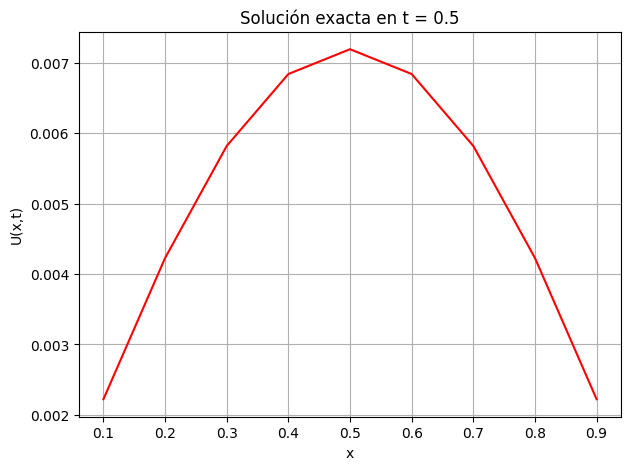

In [ ]:

# Ahora escribimos la solucion exacta como función
def u_exacta(x, t):
    # np.exp y np.sin trabajan con arrays y escalares
    # -π²t es el factor de decaimiento exponencial
    return np.exp(-np.pi**2 * t) * np.sin(np.pi * x)

sol_ex = u_ex(x_in, t_f)

# grafica de la solución exacta
plt.figure(figsize=(7,5))
plt.plot(x_in, sol_ex, color = 'red')
plt.xlabel('x')
plt.ylabel('U(x,t)')
plt.title(f'Solución exacta en t = {t_f}')
plt.grid(True)
plt.show()


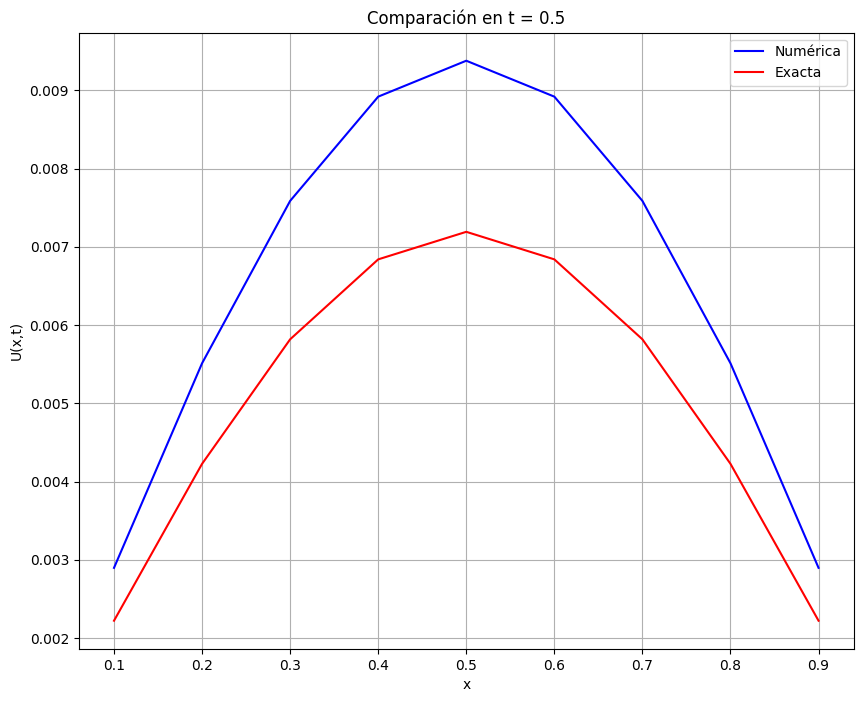

In [ ]:
# juntamos las dos graficas para una mejor comparacion entre ambas

plt.figure(figsize=(10,8))
plt.plot(x_in, sol_num, color='blue', label='Numérica')
plt.plot(x_in, sol_ex, color='red', label='Exacta')
plt.xlabel('x')
plt.ylabel('U(x,t)')
plt.title(f'Comparación en t = {t_f}')
plt.grid(True)
plt.legend()
plt.show()


**Ejercicio 5**:¿Es necesario resolver el sistema de 9 x 9 o podemos hacer una simplificación?

No, Como la matriz $A_{nueva}$  no cambia con el tiempo, podemos optimizar el cálculo; en lugar de resolver el sistema 9×9 una y otra vez, solo necesitamos factorizar la matriz una vez al inicio. Luego, en cada paso temporal, reutilizamos esa factorización para obtener rápidamente la nueva solución. Esto hace que el método sea mucho más eficiente.

In [ ]:
j = 20 # Número de pasos en el tiempo

In [ ]:
U=richardson(A, b, j)

In [ ]:
x = np.linspace(0, 1, 9) #Número de nodos internos en X
y = np.linspace(0, 0.6, j+1) #Debe coincidir con el tamaño de j por k (tiempo)
X, Y = np.meshgrid(x, y) # X: Matriz de dimensiones (len(y), len(x)) - coordenadas x repetidas
# Y: Matriz de dimensiones (len(y), len(x)) - coordenadas y repetidas

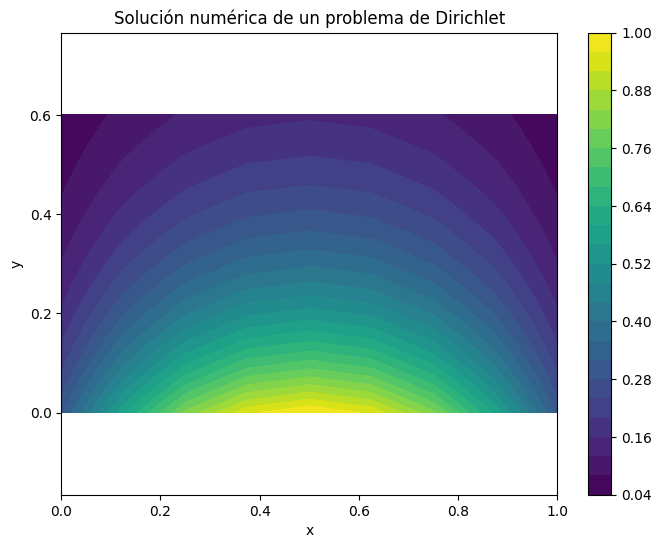

In [ ]:
# Mapa de colores
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, U, levels=25, cmap=cm.viridis)
plt.colorbar(contour)
plt.title('Solución numérica de un problema de Dirichlet')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

# Explicación Gráfica
Este gráfico muestra cómo cambia la temperatura con el paso del tiempo usando el método de Richardson. En el eje horizontal vemos la posición en la barra y en el vertical, el tiempo transcurrido. Los colores nos indican qué tan caliente está cada punto. Partiendo de una distribución inicial en forma de seno, el calor se va distribuyendo gradualmente hasta que toda la barra se enfría completamente, ya que los extremos se mantienen fríos.

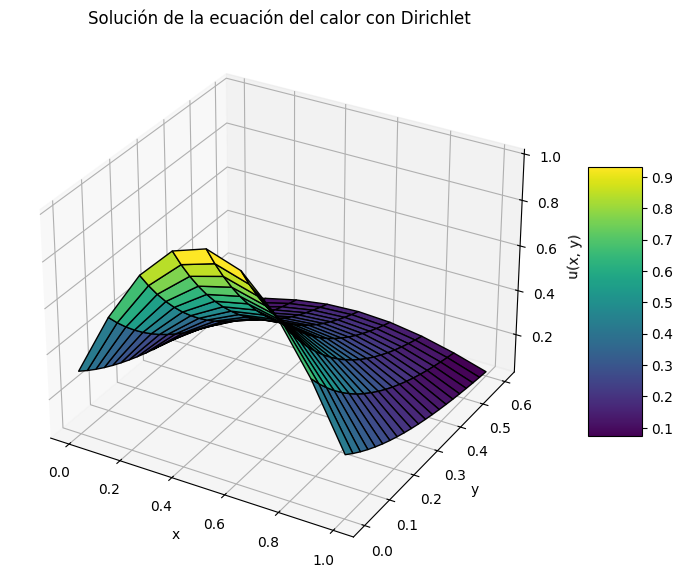

In [ ]:

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U, cmap=cm.viridis, edgecolor='k')
ax.set_title('Solución de la ecuación del calor con Dirichlet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

# Explicación Gráfica

Esta es la misma solución numérica pero vista en 3D. La altura de la superficie (eje Z) nos muestra la temperatura en cada punto y momento. Al inicio vemos una forma de onda pronunciada que representa la distribución inicial de calor, pero con el tiempo esta superficie se va "desinflando" hasta volverse casi plana, indicando que el calor se ha distribuido uniformemente. Esta transición suave sin oscilaciones extrañas nos confirma que el método numérico funciona correctamente.

**Ejercicio 6**: Hay un ligero detalle con la precisión de estas gráficas, ¿cuál? $\\[6ex]$


Al tener tan pocos puntos para representar toda la barra, la gráfica resultante tiende a perder suavidad y aparece con segmentos rectos en lugar de la curva continua que esperaríamos.

Aunque el tamaño de paso h = 0.1 pueda parecernos pequeño visualmente, desde el punto de vista computacional se considera una malla gruesa. Esta resolución limitada afecta directamente la precisión de nuestra aproximación, ya que con más puntos podríamos capturar mejor el comportamiento real de la solución.

En esencia, nos encontramos ante un equilibrio entre el costo computacional y la precisión deseada. La malla actual, aunque funcional, no es lo suficientemente refinada para ofrecer una aproximación óptima del fenómeno físico que estamos modelando.

#### Rúbrica:


|   Criterio | Calificación|
|:----------:|:-----------:|
| Presentación    |  10 puntos   |  
| Comentarios  |  10 puntos   |
| Documentación  |  10 puntos   |
| Funcionamiento  |  10 puntos   |
| Corrección  |  10 puntos   |
| Ejercicios  |  40 puntos   |
| Autonomía  |  10 puntos   |



**Comentarios**: Explicación breve y concisa sobre los bloques de códigos, funciones, etc.<br>
**Documentación**: Anotaciones sobre la sintaxis de Python: verisones, uso de librerías, estructuras, funciones búcles, etc. Solo lo que no sea obvio. <br>
**Presentación**: Uso profesional de texto, imágenes, tablas, ecuaciones para completar la Notebook (Que esta pueda usarse en una presentación).<br>
**Ejercicios**: Presenta la solución completa correcta de los ejercicios propuestos.<br>
**Funcionamiento**: El código se puede ejecutar sin errores.<br>
**Corrección**: El código devuelve las funciones correctas.<br>
**Autónomia**: Uso razonado e inteligente de la IA. Por ética, su uso causará la mínima calificación global.<br>



Material extra. Si lo desea, incorpore el material que pueda aprovechar en el lugar conveniente.

In [ ]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U, cmap=cm.viridis)
plt.show()

<IPython.core.display.Javascript object>

In [ ]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

def update(k):
    ax.clear()
    ax.plot_surface(X, Y, U, cmap=cm.viridis)   # superficie completa
    ax.plot(x, y[k]*np.ones_like(x), U[k], color='r', lw=3)  # curva que se mueve
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_zlabel('u')
    ax.set_title(f"Iteración / Tiempo: {k}")
    return []

anim = FuncAnimation(fig, update, frames=len(y), interval=200)
plt.show()


<IPython.core.display.Javascript object>

/usr/local/lib/python3.12/dist-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import numpy as np

# U ya viene de:
# U = richardson(A, b, j)
# y y x ya están definidos

fig, ax = plt.subplots(figsize=(8, 5))
line, = ax.plot(x, U[0], lw=2, color='blue')

ax.set_ylim(np.min(U), np.max(U))
ax.set_xlabel('x')
ax.set_ylabel('u(x,t)')
ax.set_title('Evolución en el tiempo')

def update(k):
    line.set_ydata(U[k])
    ax.set_title(f'Tiempo = {y[k]:.3f}')
    return line,

anim = FuncAnimation(fig, update, frames=len(y), interval=200)

# Guardar como GIF
writer = PillowWriter(fps=6)
anim.save("animacion.gif", writer=writer)
print("Listo: archivo guardado como animacion.gif")